In [1]:
import qsharp
from MaxCut import PrepareAnsatzes

Preparing Q# environment...


In [2]:
from functools import reduce

def maxcut_obj(x: str):
    return reduce(lambda obj, e: obj - (1 if x[e[0]] != x[e[1]] else 0), [(0, 1), (1, 2), (2, 3), (3, 0)], 0)

In [3]:
from collections import Counter

def compute_expectation(cuts: Counter):
    sum, count = reduce(lambda t, c: (t[0] + (maxcut_obj(c) * cuts[c]), t[1] + cuts[c]), cuts, (0, 0))
    return sum / count

In [4]:
def get_expectation(shots=512):
    def execute_circ(params: list[float]):
        results = PrepareAnsatzes.simulate(beta=params[0], gamma=params[1], shots=shots)
        return compute_expectation(Counter(results))

    return execute_circ

In [5]:
from scipy.optimize import minimize

expectation = get_expectation()
res = minimize(expectation, [1.0, 1.0], method='COBYLA')
res

     fun: -3.953125
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 29
  status: 1
 success: True
       x: array([1.04680665, 1.06645316])

<BarContainer object of 8 artists>

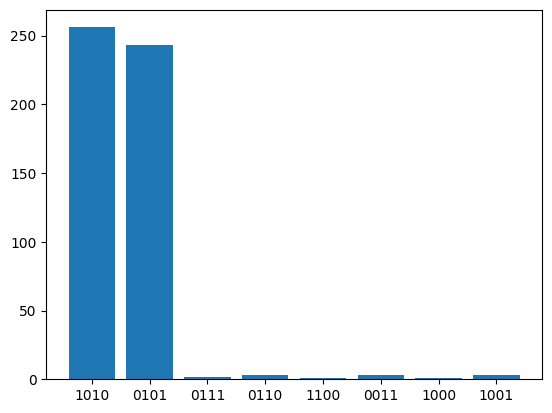

In [6]:
import matplotlib.pyplot as plt

results = PrepareAnsatzes.simulate(beta=res.x[0], gamma=res.x[1], shots=512)
counter = Counter(results)

plt.bar(counter.keys(), counter.values())